<a href="https://colab.research.google.com/github/rabbitew/ai-practice/blob/main/weather_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
x = tf.placeholder(tf.float32, [None,5])
w = tf.Variable(tf.zeros([5,1]))
y = tf.matmul(x,w)
t = tf.placeholder(tf.float32, [None,1]) # target
loss = tf.reduce_sum(tf.square(y-t)) # 손실함수
train_step = tf.train.AdamOptimizer().minimize(loss)

In [ ]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [ ]:
# 훈련에 참여시킬 데이터들 1월부터 12월 까지의 기온
train_t = np.array([5.2, 5.7, 8.6, 14.9, 18.2, 20.4,
                    25.5, 26.4, 22.8, 17.5, 11.1, 6.6])
train_t = train_t.reshape([12,1])
train_x = np.zeros([12,5])
for row, month in enumerate(range(1,13)) :
  for col, n in enumerate(range(0,5)):
    train_x[row][col] = month**n

In [ ]:
i=0
for _ in range(100000) :
  i += 1
  sess.run(train_step, feed_dict = {x : train_x, t : train_t})

  if i%10000 == 0 :
    loss_val = sess.run(loss, feed_dict={x:train_x, t:train_t})
    print('Step : %d, Loss : %f' % (i, loss_val))

Step : 10000, Loss : 26.127228
Step : 20000, Loss : 25.076778
Step : 30000, Loss : 23.937796
Step : 40000, Loss : 23.069298
Step : 50000, Loss : 22.430302
Step : 60000, Loss : 21.777359
Step : 70000, Loss : 21.019220
Step : 80000, Loss : 20.188745
Step : 90000, Loss : 19.662178
Step : 100000, Loss : 19.050169


In [ ]:
w_val = sess.run(w)
print(w_val)

[[ 4.780775  ]
 [-2.653796  ]
 [ 2.0998633 ]
 [-0.23613387]
 [ 0.00665597]]


In [ ]:
# 그래프

def predict(x) :
  result = 0.0
  for n in range(0,5) :
    result += w_val[n][0] * x**n
  return result

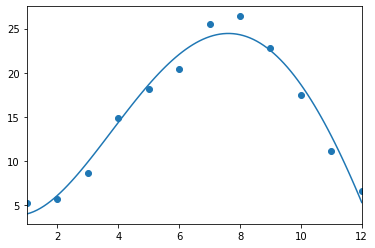

In [ ]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xlim(1,12)
subplot.scatter(range(1,13), train_t)
linex = np.linspace(1,12,100)
liney = predict(linex)
subplot.plot(linex, liney)